# Install and Import Modules

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

In [4]:
import cv2 
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Defining the path of images

In [5]:
img1_path = './Cognifront_img/images/Cheque.jpg'
img2_path = './Cognifront_img/images/Cheque2.jpg'
img3_path = './Cognifront_img/images/Cheque3.jpg'
img4_path = './Cognifront_img/images/acc.jpg'
img5_path = './Cognifront_img/images/date.jpg'
img6_path = './Cognifront_img/images/signature.jpg'

In [6]:
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [ ]:
result = recognize_text(img1_path)

In [ ]:
result

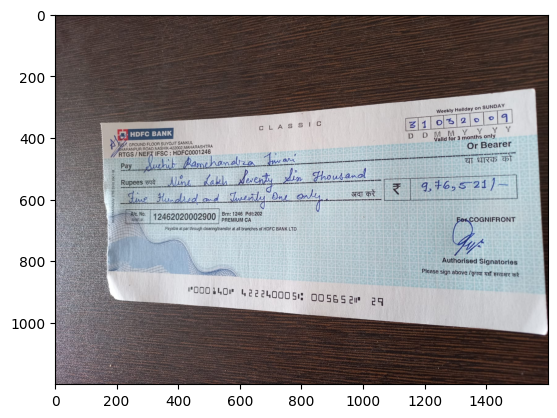

In [7]:
img_1 = cv2.imread(img1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Recognize the text from images

In [16]:
def ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''
    
    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)
    
    # Recognize tex
    result = recognize_text(img_path)
    
    # If OCR prob is over 0.2, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')
            
            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            
            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)
            
            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)
            
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./Project_output/{save_name}.overlay.jpg', bbox_inches='tight')
            

In [17]:
# Extracting the text from image
# overlay_ocr_text(img1_path, 'cheque')

Detected text: 02 Tune 8003 (Probability: 0.68)
Detected text: PAY (Probability: 1.00)
Detected text: T8 (Probability: 0.24)
Detected text: e (Probability: 0.95)
Detected text: Jwo (Probability: 0.40)
Detected text: Lakh (Probability: 0.40)
Detected text: tboxSand (Probability: 0.41)
Detected text: Six (Probability: 1.00)
Detected text: 743 RUPEES (Probability: 0.43)
Detected text: 2,50,6 02 (Probability: 0.77)
Detected text: bundred (Probability: 0.40)
Detected text: an 4 (Probability: 0.29)
Detected text: Tw 0 (Probability: 0.53)
Detected text: 3T &7 (Probability: 0.27)
Detected text: Alc. No. (Probability: 0.27)
Detected text: 31583611696 (Probability: 1.00)
Detected text: IFS Code: SBINO006333 (Probability: 0.55)
Detected text: State Bank of India (Probability: 0.76)
Detected text: Prefix (Probability: 1.00)
Detected text: (06333) - PANCHAVATI(NASIK) (Probability: 0.72)
Detected text: SUCHITTIWARI (Probability: 1.00)
Detected text: 0438200004 (Probability: 1.00)
Detected text: POST

<Figure size 640x480 with 0 Axes>

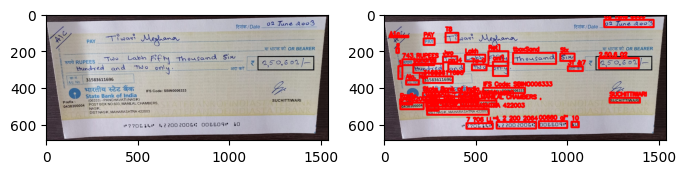

In [18]:
ocr_text(img2_path, 'cheque')

In [23]:
def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''
    
    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)
    
    # Recognize tex
    result = recognize_text(img_path)
    
    # If OCR prob is over 0.5, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.5:
            print( save_name,' : ',text)
            
            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            
            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)
            
            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)
            
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./Project_output/{save_name}.overlay.jpg', bbox_inches='tight')

Price Detection  :  2,5 0,6 02


<Figure size 640x480 with 0 Axes>

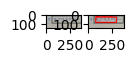

In [24]:
overlay_ocr_text(img4_path, 'Price Detection')

Date Detection  :  02 Tune 8003


<Figure size 640x480 with 0 Axes>

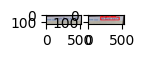

In [25]:
overlay_ocr_text(img5_path, 'Date Detection')

Name of the Signature  :  SUCHITTIWARI


<Figure size 640x480 with 0 Axes>

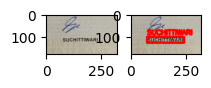

In [26]:
overlay_ocr_text(img6_path, 'Name of the Signature')